# **Sleep Efficiency Analysis**

## Import and Data

In [202]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [203]:
df = pd.read_csv("Sleep_Efficiency.csv")

## Exploring Data

In [204]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      452 non-null    int64  
 1   Age                     452 non-null    int64  
 2   Gender                  452 non-null    object 
 3   Bedtime                 452 non-null    object 
 4   Wakeup time             452 non-null    object 
 5   Sleep duration          452 non-null    float64
 6   Sleep efficiency        452 non-null    float64
 7   REM sleep percentage    452 non-null    int64  
 8   Deep sleep percentage   452 non-null    int64  
 9   Light sleep percentage  452 non-null    int64  
 10  Awakenings              432 non-null    float64
 11  Caffeine consumption    427 non-null    float64
 12  Alcohol consumption     438 non-null    float64
 13  Smoking status          452 non-null    object 
 14  Exercise frequency      446 non-null    fl

In [205]:
df.isna().sum()

ID                         0
Age                        0
Gender                     0
Bedtime                    0
Wakeup time                0
Sleep duration             0
Sleep efficiency           0
REM sleep percentage       0
Deep sleep percentage      0
Light sleep percentage     0
Awakenings                20
Caffeine consumption      25
Alcohol consumption       14
Smoking status             0
Exercise frequency         6
dtype: int64

In [206]:
df.describe()

,ID,Age,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Exercise frequency
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,432.000000,427.000000,438.000000,446.000000
mean,226.500000,40.285398,7.465708,0.788916,22.615044,52.823009,24.561947,1.641204,23.653396,1.173516,1.791480
std,130.625419,13.172250,0.866625,0.135237,3.525963,15.654235,15.313665,1.356762,30.202785,1.621377,1.428134
min,1.000000,9.000000,5.000000,0.500000,15.000000,18.000000,7.000000,0.000000,0.000000,0.000000,0.000000
25%,113.750000,29.000000,7.000000,0.697500,20.000000,48.250000,15.000000,1.000000,0.000000,0.000000,0.000000
50%,226.500000,40.000000,7.500000,0.820000,22.000000,58.000000,18.000000,1.000000,25.000000,0.000000,2.000000
75%,339.250000,52.000000,8.000000,0.900000,25.000000,63.000000,32.500000,3.000000,50.000000,2.000000,3.000000
max,452.000000,69.000000,10.000000,0.990000,30.000000,75.000000,63.000000,4.000000,200.000000,5.000000,5.000000


<Axes: >

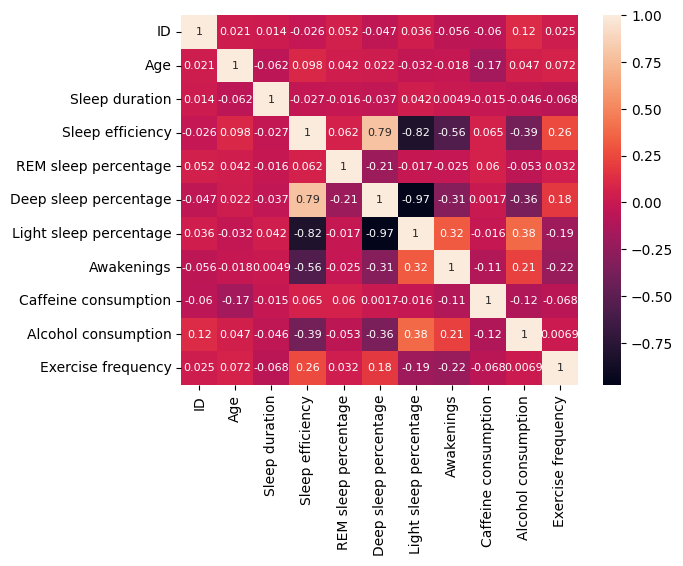

In [207]:
sns.heatmap(df.corr(numeric_only=True), annot=True, annot_kws={"size":8})


In [208]:
df[df["Awakenings"].isna() & df["Caffeine consumption"].isna()]

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
404,405,24,Male,2021-04-10 02:30:00,2021-04-10 08:30:00,6.0,0.64,22,24,54,NaN,NaN,3.0,Yes,1.0


In [209]:
df.drop(["Bedtime","Wakeup time"], inplace=True,axis=1)

In [210]:
df.head()

,ID,Age,Gender,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,1,65,Female,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0
1,2,69,Male,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0
2,3,40,Female,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,4,40,Female,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0
4,5,57,Male,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0


In [211]:
df["REM sleep time"]= df["Sleep duration"]*df["REM sleep percentage"]/100
df["Deep sleep time"]= df["Sleep duration"]*df["Deep sleep percentage"]/100
df["Light sleep time"]= df["Sleep duration"]*df["Light sleep percentage"]/100

In [212]:
df.drop(["REM sleep percentage" , "Deep sleep percentage" , "Light sleep percentage","ID"], axis=1, inplace=True)

In [213]:
df.head()

,Age,Gender,Sleep duration,Sleep efficiency,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency,REM sleep time,Deep sleep time,Light sleep time
0,65,Female,6.0,0.88,0.0,0.0,0.0,Yes,3.0,1.08,4.20,0.72
1,69,Male,7.0,0.66,3.0,0.0,3.0,Yes,3.0,1.33,1.96,3.71
2,40,Female,8.0,0.89,1.0,0.0,0.0,No,3.0,1.60,5.60,0.80
3,40,Female,6.0,0.51,3.0,50.0,5.0,Yes,1.0,1.38,1.50,3.12
4,57,Male,8.0,0.76,3.0,0.0,3.0,No,3.0,2.16,4.40,1.44


In [214]:
map_smoke={
    "Yes": 1, "No":0
}

map_gender= {
    "Male":1, 
    "Female":0
}

In [215]:
df["Smoking status"]=df["Smoking status"].map(map_smoke)

In [216]:
df["Gender"]= df["Gender"].map(map_gender)

In [217]:
df.head()

,Age,Gender,Sleep duration,Sleep efficiency,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency,REM sleep time,Deep sleep time,Light sleep time
0,65,0,6.0,0.88,0.0,0.0,0.0,1,3.0,1.08,4.20,0.72
1,69,1,7.0,0.66,3.0,0.0,3.0,1,3.0,1.33,1.96,3.71
2,40,0,8.0,0.89,1.0,0.0,0.0,0,3.0,1.60,5.60,0.80
3,40,0,6.0,0.51,3.0,50.0,5.0,1,1.0,1.38,1.50,3.12
4,57,1,8.0,0.76,3.0,0.0,3.0,0,3.0,2.16,4.40,1.44


<Axes: >

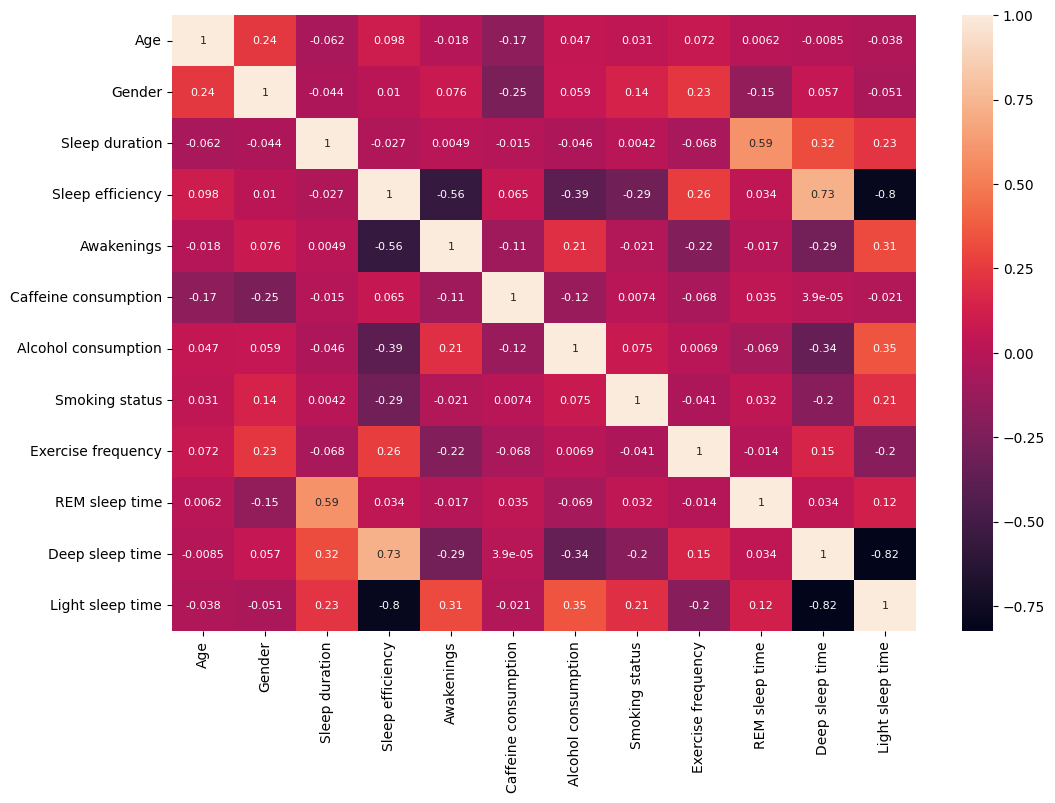

In [218]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, annot_kws={"size":8})

In [219]:
corr= df.corr()
np.fill_diagonal(corr.values, 0)
corr.max()

Age                     0.244468
Gender                  0.244468
Sleep duration          0.591814
Sleep efficiency        0.728975
Awakenings              0.310419
Caffeine consumption    0.065082
Alcohol consumption     0.346486
Smoking status          0.206431
Exercise frequency      0.259563
REM sleep time          0.591814
Deep sleep time         0.728975
Light sleep time        0.346486
dtype: float64

In [220]:
corr.min()

Age                    -0.171460
Gender                 -0.249854
Sleep duration         -0.068272
Sleep efficiency       -0.795656
Awakenings             -0.564979
Caffeine consumption   -0.249854
Alcohol consumption    -0.389624
Smoking status         -0.290026
Exercise frequency     -0.219578
REM sleep time         -0.147848
Deep sleep time        -0.824427
Light sleep time       -0.824427
dtype: float64

As you can see the highest positive corelation is in between sleep efficiency and Deep sleep time, 

also hightest negative corelation is in between Deep sleep time and Light sleep time

## Filling the missing values

In [221]:
df.isna().sum()

Age                      0
Gender                   0
Sleep duration           0
Sleep efficiency         0
Awakenings              20
Caffeine consumption    25
Alcohol consumption     14
Smoking status           0
Exercise frequency       6
REM sleep time           0
Deep sleep time          0
Light sleep time         0
dtype: int64

In [222]:
nums_df = df.select_dtypes(include=["float64", "int64"]).columns
cat_df = df.select_dtypes(include=['object']).columns

In [223]:
for k in nums_df:
    df[k] = df[k].fillna(df[k].mean())

for x in cat_df:
    df[k] = df[k].fillna(df[k].mode()[0])

In [224]:
df.isna().sum()

Age                     0
Gender                  0
Sleep duration          0
Sleep efficiency        0
Awakenings              0
Caffeine consumption    0
Alcohol consumption     0
Smoking status          0
Exercise frequency      0
REM sleep time          0
Deep sleep time         0
Light sleep time        0
dtype: int64

In [225]:
df.head()

,Age,Gender,Sleep duration,Sleep efficiency,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency,REM sleep time,Deep sleep time,Light sleep time
0,65,0,6.0,0.88,0.0,0.0,0.0,1,3.0,1.08,4.20,0.72
1,69,1,7.0,0.66,3.0,0.0,3.0,1,3.0,1.33,1.96,3.71
2,40,0,8.0,0.89,1.0,0.0,0.0,0,3.0,1.60,5.60,0.80
3,40,0,6.0,0.51,3.0,50.0,5.0,1,1.0,1.38,1.50,3.12
4,57,1,8.0,0.76,3.0,0.0,3.0,0,3.0,2.16,4.40,1.44


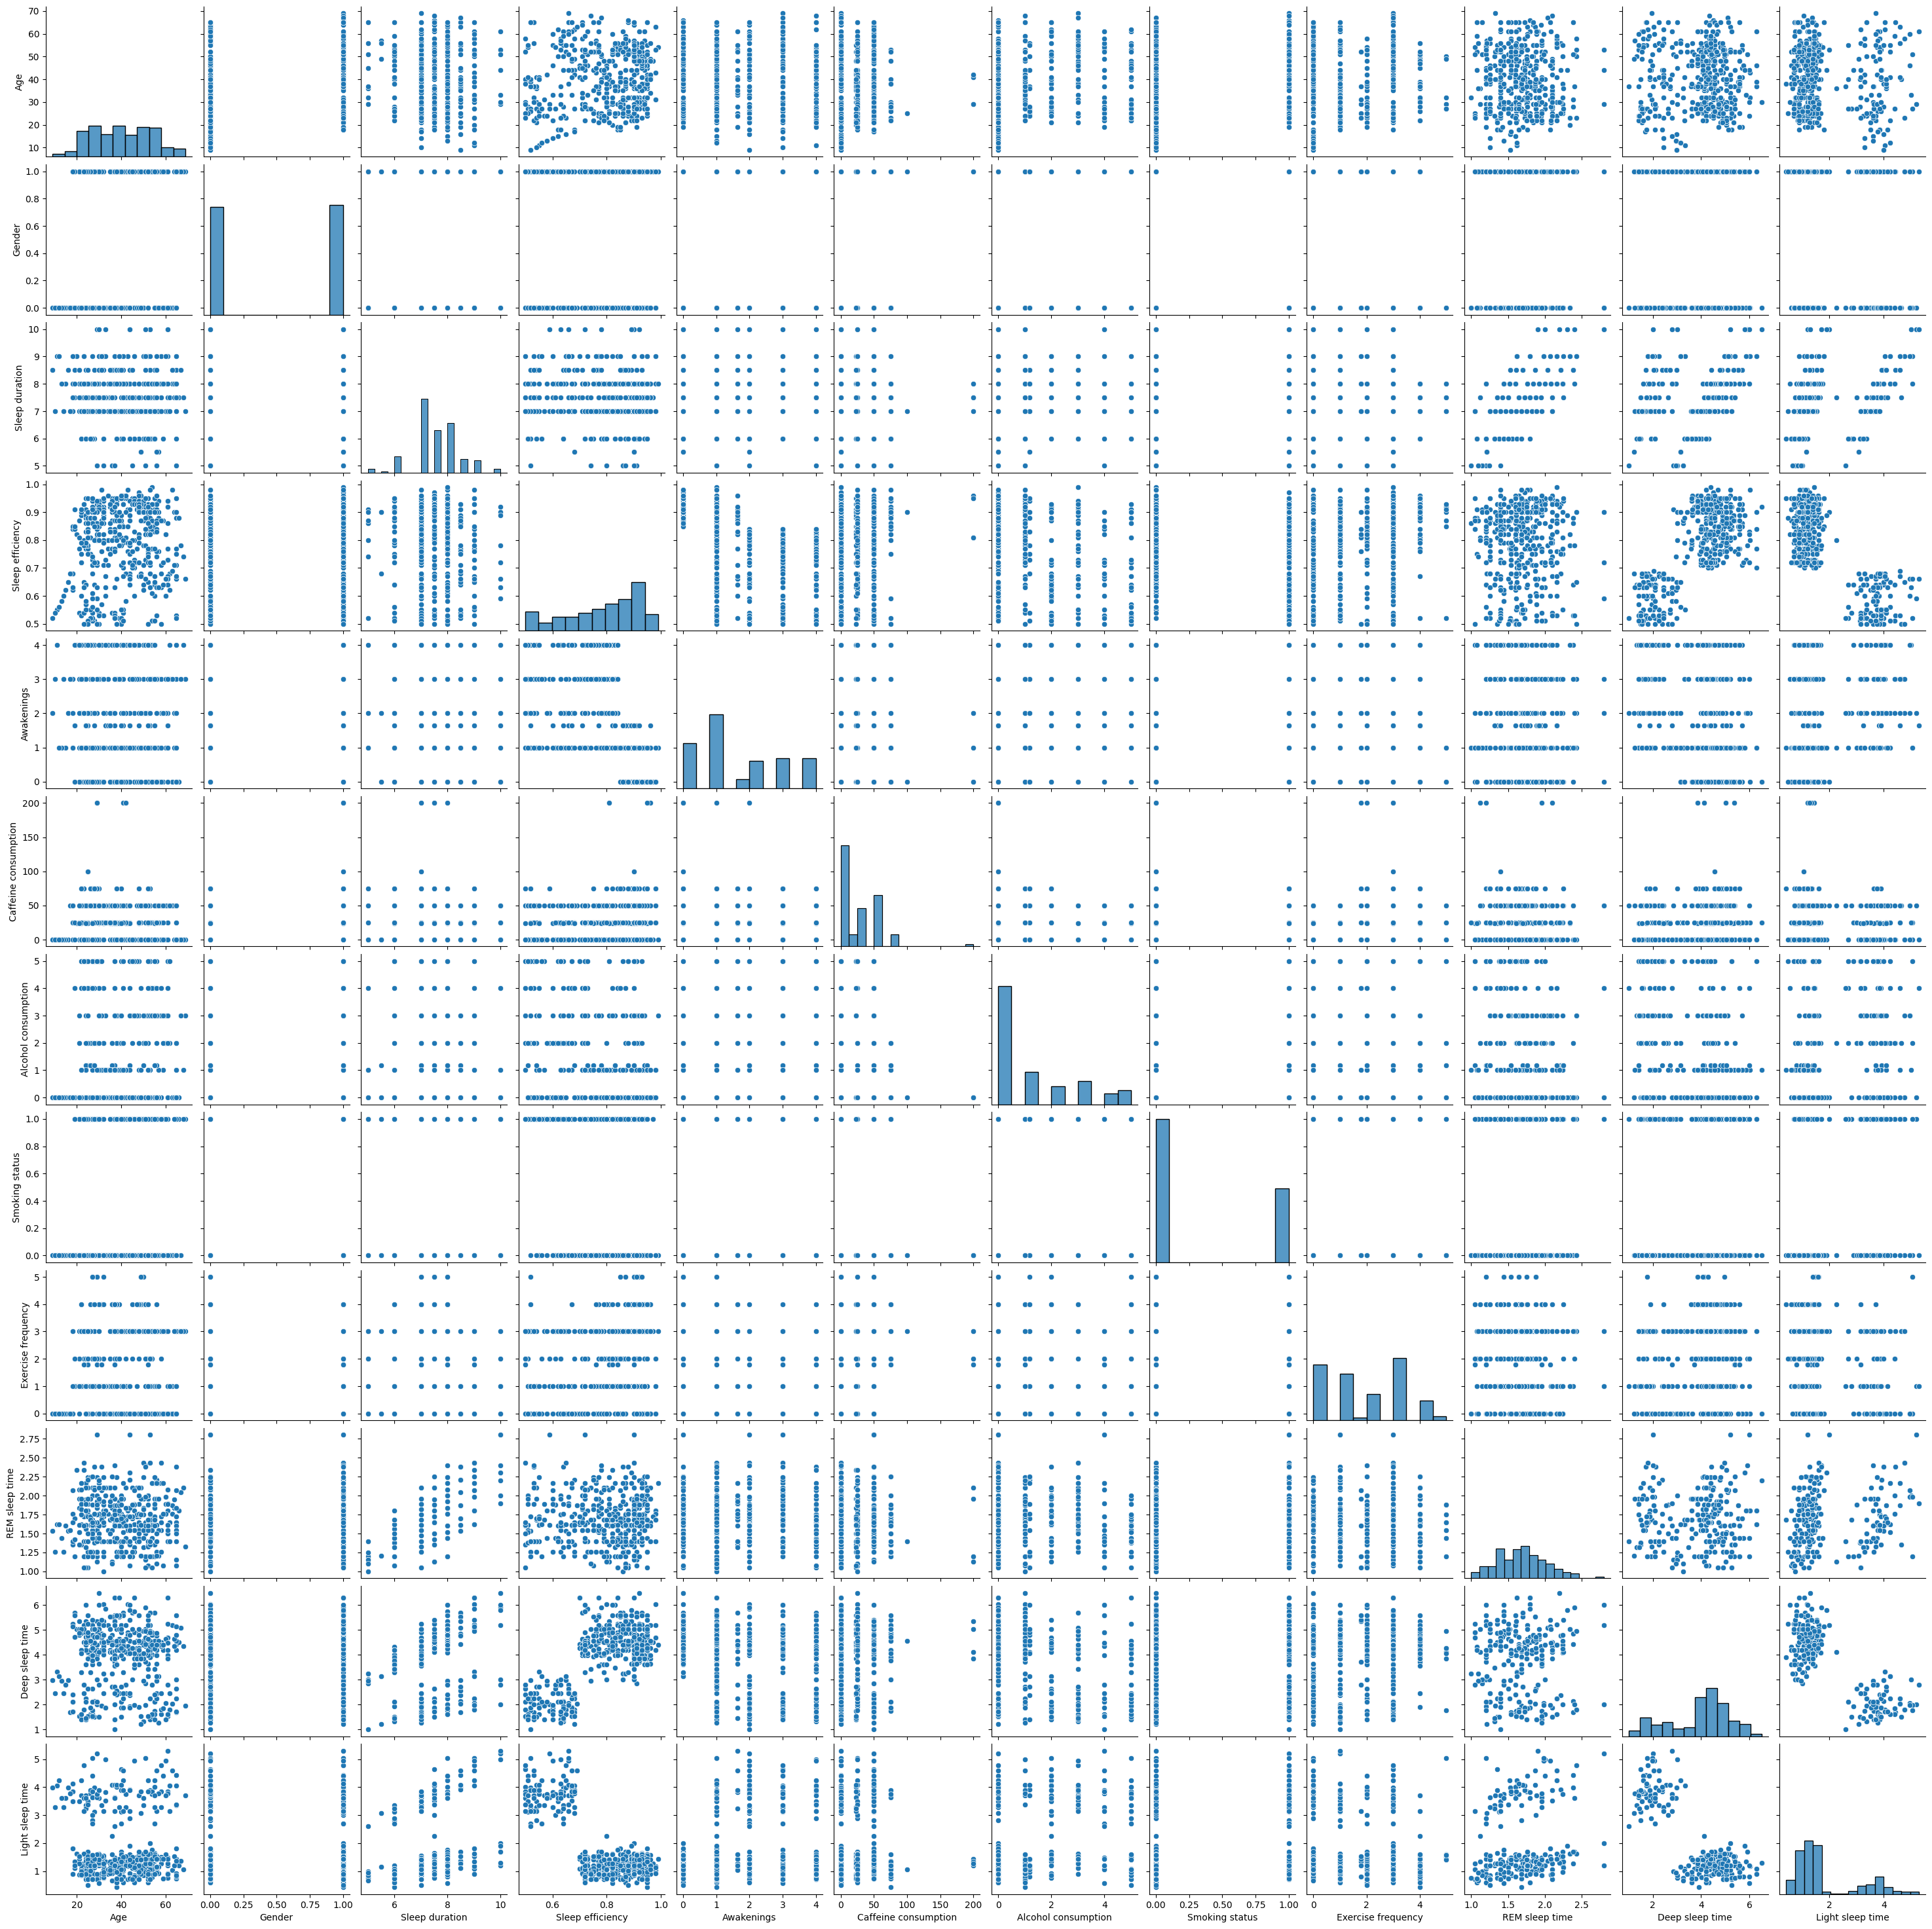

In [226]:
sns.pairplot(data=df)

## Scaling

In [227]:
X= df.drop("Sleep efficiency", axis=1)
y= df["Sleep efficiency"]

In [228]:
X.head()

,Age,Gender,Sleep duration,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency,REM sleep time,Deep sleep time,Light sleep time
0,65,0,6.0,0.0,0.0,0.0,1,3.0,1.08,4.20,0.72
1,69,1,7.0,3.0,0.0,3.0,1,3.0,1.33,1.96,3.71
2,40,0,8.0,1.0,0.0,0.0,0,3.0,1.60,5.60,0.80
3,40,0,6.0,3.0,50.0,5.0,1,1.0,1.38,1.50,3.12
4,57,1,8.0,3.0,0.0,3.0,0,3.0,2.16,4.40,1.44


## Linear Regression

In [229]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

from sklearn.linear_model import LinearRegression


In [230]:
regr = LinearRegression()

In [231]:
regr.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [232]:
regr_pred = regr.predict(X_test)

In [233]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [234]:
print("Theta :     ", round(regr.coef_[0],2))
print("Intercept : ", round(regr.intercept_,2))
print("R^2 :       ", round(r2_score(y_test,regr_pred),2))
print("MAE :       ", round(mean_absolute_error(y_test,regr_pred),2))
print("RMSE :      ", round(np.sqrt(mean_squared_error(y_test,regr_pred)),2))

Theta :      0.0
Intercept :  0.77
R^2 :        0.81
MAE :        0.05
RMSE :       0.06


<Axes: xlabel='Sleep efficiency', ylabel='Caffeine consumption'>

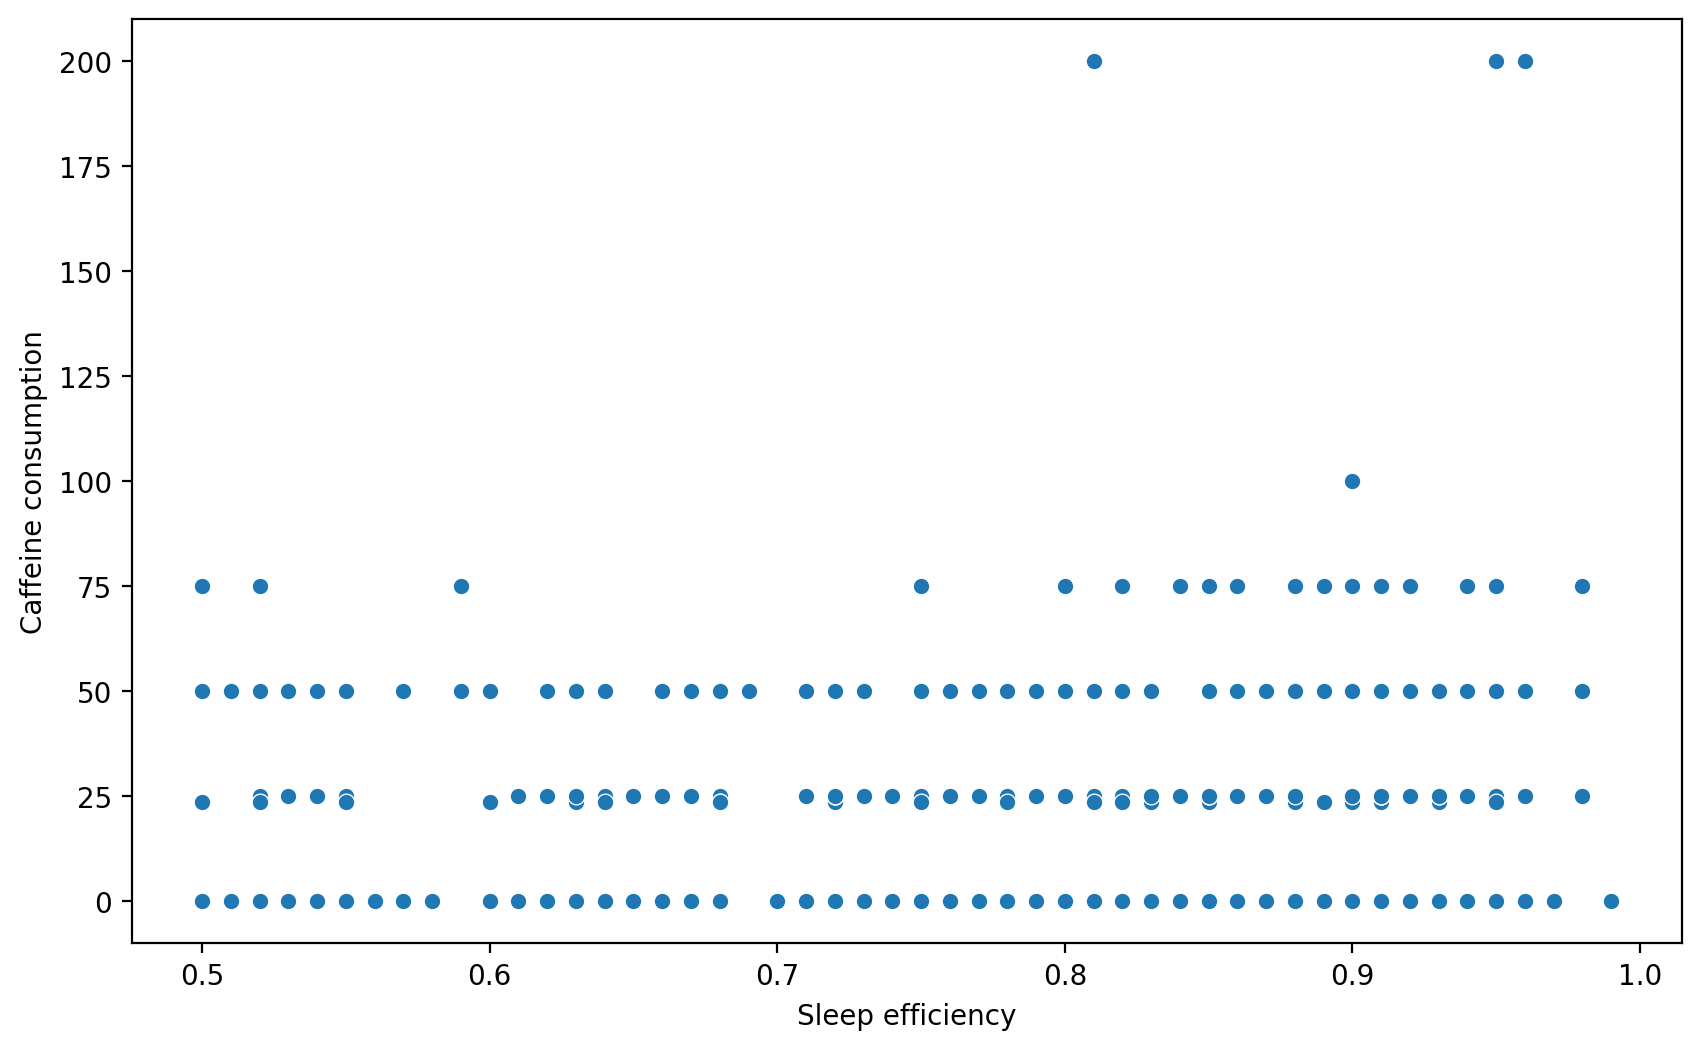

In [235]:
plt.figure(figsize=(10,6), dpi=200)

sns.scatterplot(data=df, x="Sleep efficiency", y="Caffeine consumption")


## Final Model Of Linear Regression

In [236]:
final = LinearRegression()

In [237]:
final.fit(X,y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [238]:
y_hat= final.predict(X)

In [239]:
final.coef_

array([ 0.00081222,  0.00449728, -0.00177767, -0.03392235,  0.0001297 ,
       -0.00658808, -0.04619306,  0.0049378 ,  0.03752841,  0.01740117,
       -0.05670725])

In [240]:
coef_df = pd.DataFrame(final.coef_, X.columns,columns=["Coefficients"])
coef_df

,Coefficients
Age,0.000812
Gender,0.004497
Sleep duration,-0.001778
Awakenings,-0.033922
Caffeine consumption,0.000130
Alcohol consumption,-0.006588
Smoking status,-0.046193
Exercise frequency,0.004938
REM sleep time,0.037528
Deep sleep time,0.017401


# Lets Try GridSearch

In [241]:
from sklearn.linear_model import ElasticNet

In [242]:
elasticmodel= ElasticNet()

In [243]:
from sklearn.model_selection import GridSearchCV

In [244]:
params ={
    "alpha":[.01,.1,1,5,10,50,100,1000],
    "l1_ratio":[.01,.1,.5,.7,.9,.95,.99,1]
}

grid_model = GridSearchCV(
    estimator= elasticmodel,
    param_grid=params,
    scoring="neg_mean_squared_error",
    cv=5,
    verbose=2
)

In [245]:
grid_model.fit(X_train,y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV] END ..........................alpha=0.01, l1_ratio=0.01; total time=   0.0s
[CV] END ..........................alpha=0.01, l1_ratio=0.01; total time=   0.0s
[CV] END ..........................alpha=0.01, l1_ratio=0.01; total time=   0.0s
[CV] END ..........................alpha=0.01, l1_ratio=0.01; total time=   0.0s
[CV] END ..........................alpha=0.01, l1_ratio=0.01; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time=   0.0s
[CV] END ...........................alpha=0.01,

,estimator,ElasticNet()
,param_grid,"{'alpha': [0.01, 0.1, ...], 'l1_ratio': [0.01, 0.1, ...]}"
,scoring,'neg_mean_squared_error'
,n_jobs,None
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,alpha,0.01


In [246]:
grid_model.best_estimator_


,alpha,0.01
,l1_ratio,0.01
,fit_intercept,True
,precompute,False
,max_iter,1000
,copy_X,True
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [247]:
grid_model.best_params_

{'alpha': 0.01, 'l1_ratio': 0.01}

In [248]:
y_pred = grid_model.predict(X_test)

In [249]:
mean_squared_error(y_test, y_pred)**0.5

0.062156276138897494

In [250]:
print("Theta :     ", round(regr.coef_[0],2))
print("Intercept : ", round(regr.intercept_,2))
print("R^2 :       ", round(r2_score(y_test,y_pred),2))
print("MAE :       ", round(mean_absolute_error(y_test,y_pred),2))
print("RMSE :      ", round(np.sqrt(mean_squared_error(y_test,y_pred)),2))

Theta :      0.0
Intercept :  0.77
R^2 :        0.81
MAE :        0.05
RMSE :       0.06


In [251]:
results = {
    "Model": ["Linear Regression", "GridSearch"],
    "Intercept": [0.77, 0.77],
    "R²": [0.81, 0.81],
    "MAE": [0.05, 0.05],
    "RMSE": [0.06, 0.06]
}

df_results = pd.DataFrame(results)
df_results

,Model,Intercept,R²,MAE,RMSE
0,Linear Regression,0.77,0.81,0.05,0.06
1,GridSearch,0.77,0.81,0.05,0.06
